# Combined figure for paper

In [125]:
%pylab inline
import pandas as pd

plt.rcParams.update({
    "figure.dpi": 100,
    "figure.facecolor": "white",
    
    "savefig.dpi": 150,
    
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    "font.size": 8,
    
    "lines.linewidth": 1,
    "lines.marker": "",
    "lines.markersize": 3,
    
    "axes.spines.left": False,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.edgecolor": "grey",
    "axes.labelsize": 6,
    "axes.labelcolor": "grey",
    "axes.facecolor": "#00000000",
    'axes.titlesize': 7,
    'axes.titlelocation': 'left',
    'axes.linewidth': 0.5,
    'axes.titlepad': 0.0,
    'axes.labelpad': .5,
    
    "xtick.color": "grey",
    "xtick.labelsize": 6,
    "xtick.major.size": 1.5,
    'xtick.major.pad': 2,
    
    "ytick.major.size": 0,
    "ytick.color": "grey",
    "ytick.labelsize": 5,
    'ytick.major.pad': .5,
    
    "text.color": "grey",
    "text.usetex": False
})

Populating the interactive namespace from numpy and matplotlib


In [4]:
[sim_inter_clustering, sim_indep_clustering] = pd.read_pickle("../sensitivity/simulated_clustering_all.pickle")
[sim_inter_similarity, sim_indep_similarity] = pd.read_pickle("../sensitivity/simulated_similarity.pickle")
[sim_inter_pc, sim_indep_pc] = pd.read_pickle("../sensitivity/simulated_pc.pickle")

sim_inter_similarity = sim_inter_similarity - sim_inter_similarity[50]
sim_indep_similarity = sim_indep_similarity - sim_indep_similarity[50]

In [55]:
[WOS_clustering, WOS_shuffled_clustering, WOS_ndocs] = pd.read_pickle(
    "WOS_clustering_all.pickle")
[NYT_clustering, NYT_shuffled_clustering, NYT_ndocs] = pd.read_pickle(
    "KPTimes_clustering_all.pickle")  

[TW_clustering, TW_shuffled_clustering, TW_ndocs] = pd.read_pickle("TW_clustering_all.pickle")

[WVS_similarity, WVS_shuffled_similarity, WVS_pca, WVS_shuffled_pca, WVS_n] = pd.read_pickle(
    "WVS_similarities.pickle")   
WVS_similarity = WVS_similarity - WVS_similarity.loc[50]
WVS_shuffled_similarity = WVS_shuffled_similarity - WVS_shuffled_similarity.loc[50]


[PEW_similarity, PEW_shuffled_similarity, PEW_pca, PEW_shuffled_pca, PEW_n] = pd.read_pickle("PEW_similarities.pickle")
PEW_similarity = PEW_similarity - PEW_similarity.loc[50]
PEW_shuffled_similarity = PEW_shuffled_similarity - PEW_shuffled_similarity.loc[50]




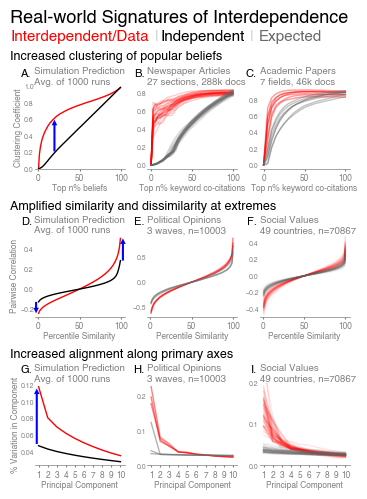

In [147]:
plt.figure(figsize=(3.5,4.8))



ax1 = plt.subplot(3,3,1)
plt.title("Simulation Prediction\nAvg. of 1000 runs")
plt.ylabel("Clustering Coefficient", loc="center")
plt.xlabel("Top n% beliefs")
plt.plot(sim_inter_clustering.index, sim_inter_clustering, 'r')
plt.plot(sim_indep_clustering.index, sim_indep_clustering, 'k')
arrowprops = dict(facecolor='b', shrink=.04, linewidth=0, width=1.5, headwidth=4, headlength=4)
ax1.annotate("", xy=(20, sim_inter_clustering[20]),  xycoords='data',
            xytext=(20, sim_indep_clustering[20]), textcoords='data',
            arrowprops=arrowprops,
            horizontalalignment='right', verticalalignment='top',
            )
ax1.annotate('A.', (-.03,1.1), xycoords='axes fraction', 
             ha='right', va='bottom', color='k')
plt.yticks([0,.2,.4,.6,.8,1])
plt.ylim(0,1)




ax5 = plt.subplot(3,3,3)
plt.title("Academic Papers\n%i fields, %ik docs" %(len(WOS_clustering.columns), WOS_ndocs/1000))
plt.xlabel("Top n% keyword co-citations")
plt.plot(WOS_clustering.index*100, WOS_clustering, 'r', alpha=.4)
plt.plot(WOS_shuffled_clustering.index*100, WOS_shuffled_clustering, 'dimgrey', alpha=.4)
ax5.annotate('C.', (-.03,1.1), xycoords='axes fraction', 
             ha='right', va='bottom', color='k')
plt.yticks([0,.2,.4,.6,.8])




ax7 = plt.subplot(3,3,2)
plt.title("Newspaper Articles\n%i sections, %ik docs" % (len(NYT_clustering.columns), NYT_ndocs/1000))
plt.xlabel(r"Top n% keyword co-citations")
plt.plot(NYT_clustering.index*100, NYT_clustering, 'r', alpha=.2)
plt.plot(NYT_shuffled_clustering.index*100, NYT_shuffled_clustering, 'dimgrey', alpha=.2)
ax7.annotate('B.', (-.03,1.1), xycoords='axes fraction', 
             ha='right', va='bottom', color='k')
plt.yticks([0,.2,.4,.6,.8])




ax2 = plt.subplot(3,3,4)
plt.title("Simulation Prediction\nAvg. of 1000 runs")
plt.ylabel("Pairwise Correlation", loc="center")
plt.xlabel("Percentile Similarity")

plt.plot(sim_inter_similarity.index, sim_inter_similarity, 'r')
plt.plot(sim_indep_similarity.index, sim_indep_similarity, 'k')

arrowprops = dict(facecolor='b', shrink=0, linewidth=0, width=1.5, headwidth=4, headlength=4)
ax2.annotate("", xy=(102, sim_inter_similarity[99]),  xycoords='data',
            xytext=(102, sim_indep_similarity[99]), textcoords='data',
            arrowprops=arrowprops,
            horizontalalignment='right', verticalalignment='top',
            )
ax2.annotate("", xy=(-2, sim_inter_similarity[1]),  xycoords='data',
            xytext=(-2, sim_indep_similarity[1]), textcoords='data',
            arrowprops=arrowprops,
            horizontalalignment='right', verticalalignment='top',
            )

ax2.annotate('D.', (-.03,1.1), xycoords='axes fraction', 
             ha='right', va='bottom', color='k')




ax6 = plt.subplot(3,3,6)
plt.title("Social Values\n%i countries, n=%i"%(len(WVS_similarity.columns), WVS_n))
plt.xlabel("Percentile Similarity")

plt.plot(WVS_similarity.index, WVS_similarity, 'r', alpha=.05)
plt.plot(WVS_shuffled_similarity.index, WVS_shuffled_similarity, 'dimgrey', alpha=.05)
ax6.annotate('F.', (-.03,1.1), xycoords='axes fraction', 
             ha='right', va='bottom', color='k')
plt.ylim(-.5,.5)




ax8 = plt.subplot(3,3,5)
plt.title("Political Opinions\n%i waves, n=%i"%(len(PEW_similarity.columns), PEW_n))
plt.xlabel("Percentile Similarity")
plt.plot(PEW_similarity.index, PEW_similarity, 'r', alpha=.5)
plt.plot(PEW_shuffled_similarity.index, PEW_shuffled_similarity, 'dimgrey', alpha=.5)
ax8.annotate('E.', (-.03,1.1), xycoords='axes fraction', 
             ha='right', va='bottom', color='k')




ax9 = plt.subplot(3,3,7)
plt.title("Simulation Prediction\nAvg. of 1000 runs")
plt.ylabel("% Variation in Component", loc="center")
plt.xlabel("Principal Component")

plt.plot(sim_inter_pc.index, sim_inter_pc, 'r')
plt.plot(sim_indep_pc.index, sim_indep_pc, 'k')

arrowprops = dict(facecolor='b', shrink=.03, linewidth=0, width=1.5, headwidth=4, headlength=4)
ax9.annotate("", xy=(.8, sim_inter_pc[1]),  xycoords='data',
            xytext=(.8, sim_indep_pc[1]), textcoords='data',
            arrowprops=arrowprops,
            horizontalalignment='right', verticalalignment='top',
            )
ax9.annotate('G.', (-.03,1.1), xycoords='axes fraction', 
             ha='right', va='bottom', color='k')
plt.xticks(range(1,11))




ax10 = plt.subplot(3,3,9)
plt.title("Social Values\n%i countries, n=%i"%(len(WVS_similarity.columns), WVS_n))
plt.xlabel("Principal Component")
plt.plot(WVS_pca.index+1, WVS_pca, 'r', alpha=.1)
plt.plot(WVS_shuffled_pca.index+1, WVS_shuffled_pca, 'dimgrey', alpha=.1)
ax10.annotate('I.', (-.03,1.1), xycoords='axes fraction', 
             ha='right', va='bottom', color='k')
plt.ylim(0,.2)
plt.yticks([0,.1,.2])
plt.xticks(range(1,11))

ax11 = plt.subplot(3,3,8)
plt.title("Political Opinions\n%i waves, n=%i"%(len(PEW_similarity.columns), PEW_n))
plt.xlabel("Principal Component")
plt.plot(PEW_pca.index+1, PEW_pca, 'r', alpha=.5)
plt.plot(PEW_shuffled_pca.index+1, PEW_shuffled_pca, 'dimgrey', alpha=.5)
ax11.annotate('H.', (-.03,1.1), xycoords='axes fraction', 
             ha='right', va='bottom', color='k')

plt.yticks([0,.1,.2])
plt.xticks(range(1,11))




# Title
plt.suptitle('Real-world Signatures of Interdependence', 
             x=0, y=1, 
             ha='left', va='top', fontsize=13, color='k')

y_text = .935
plt.figtext(x=.0, y=y_text, s='Interdependent/Data', va='baseline', ha='left', fontsize=11, color='r')
plt.figtext(x=.43, y=y_text, s='Independent',  ha='left', va='baseline', fontsize=11, color='k')
plt.figtext(x=.71, y=y_text, s='Expected',  ha='left', va='baseline', fontsize=11, color='dimgrey')
plt.figtext(x=.415, y=y_text, s='|',  ha='left', va='baseline', fontsize=11, color='lightgrey')
plt.figtext(x=.685, y=y_text, s='|',  ha='left', va='baseline', fontsize=11, color='lightgrey')


plt.figtext(x=.0, y=.895, s='Increased clustering of popular beliefs', va='baseline', ha='left', fontsize=9, color='k')
plt.figtext(x=.0, y=.5825, s='Amplified similarity and dissimilarity at extremes', va='baseline', ha='left', fontsize=9, color='k')
plt.figtext(x=.0, y=.275, s='Increased alignment along primary axes', va='baseline', ha='left', fontsize=9, color='k')

plt.tight_layout()
plt.subplots_adjust(left=.07, right=.97, top=.84, bottom=.05, wspace=.25, hspace=.8)

plt.savefig("signatures.png", dpi=300)